# 1. Avusturalya Yağmur Tahmini

## 2. Problem Tanımı ve Veri Setinin Tanıtılması, Dahil Edilmesi

### 2.1.  Veri Seti ve Veriler Nereden Elde Edildi?

     Veri seti kaggle.com dan alınmıştır. Verilerin kaynağı ise Avusturalya Hükümetine bağlı Bureau of Meterology kuruluşuna  aittir. Verilerin incelenmesi ve araştırılması amacıyla, veriler açık olarak http://www.bom.gov.au/ sitesinde paylaşılmaktadır.

### 2.2. Problemin Tanıtılması

    Problem Austuralya da farklı lokasyonlara yerleştirilmiş sensor verilerini içermektedir. Problemin Amacı sensörden alınan veriler ışığında ertesi gün yağmur yağıp yağmayacağını öngörmektir. Eğer 'Rainfall' sütunundaki değişken 'Yes' değerini alıyorsa gün içerisinde 1mm ya da daha fazla yağmur yağdığı anlamına gelmektedir. 'Rainfall' sütunundaki değişken 'No' değerini alıyorsa, 1mm ya da daha az yağmur yağdığı anlamına gelmektedir. Hedef değişkeni "0" ve "1" arası değer aldığından (Binary) problemin logictic regresyon ve xgboost yöntemleri ile ele alınması uygun görülmüştür.

### 2.3. Veri Seti ve Ön aşamada Gereken Kütüphaneler Dahil Edildi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv("weatherAUS.csv")

In [3]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### 2.4. Sütunlar

Veri setinde 23 ayrı sütun bulunmaktadır.

- Date : Tarih sütunudur. 2008 ve 2017 yılları arasında değişmektedir.

- Location : Austuralya' da farklı lokasyonları içermektedir.

- MinTemp : Güne ait sensörden alınan verilerden, sıcaklık değerine ait en küçük ölçülen değerdir. (Celcius)

- MaxTemp : Güne ait sensörden alınan verilerden, sıcaklık değerine ait en büyük ölçülen değerdir. (Celcius)

- Rainfall : Gün içinde metreküp başına ne kadar yağmur düştüğüne ait veridir.

- Evaporation : Gün içinde buharlaşma miktarını gösteren veridir.

- Sunshine : Gün içerisinde kaç saat gün ışığı etkisinde kalındığını göstermektedir.

- WindGustDir : Gün içerisindeki(24 saatlik zaman dilimi) en güçlü rüzgarın yönünü göstermektedir.

- WindGustSpeed : Gün içerisindeki(24 saatlik zaman dilimi) en güçlü rüzgarın km/s hızını göstermektedir.

- WindDir9am : 9.00 saatindeki rüzgarın yönünü göstermektedir.

- WindDir3pm : 15.00 saatindeki rüzgarın yönünü göstermektedir.

- WindSpeed9am : 9.00 saatindeki rüzgarın hızını km/s cinsinden göstermektedir.

- WindSpeed3pm : 15.00 saatindeki rüzgarın km/s cinsinden göstermektedir.

- Humidity9am : 9.00 saatinde yüzde olarak nem miktarını temsil etmektedir.

- Humidity3pm : 15.00 saatinde yüzde olarak nem miktarını temsil etmektedir.

- Pressure9am : 9.00 saatindeki atmosfer basıncını hpa cinsinden temsil etmektedir.

- Pressure3pm : 15.00 saatindeki atmosfer basıncını hpa cinsinden temsil etmektedir.

- Cloud9am : 9.00 saatindeki bulut mitarını temsil etmektedir. 0 tamamıyla açık hava 8 ise tamamıyla bulutlu hava anlamına gelmektedir. Kesikli veridir.

- Cloud3pm : 15.00 saatindeki bulut mitarını temsil etmektedir. 0 tamamıyla açık hava 8 ise tamamıyla bulutlu hava anlamına gelmektedir. Kesikli veridir.

- Temp9am : 9.00 saatinde Celcius cinsinden sıcaklığı temsil etmektedir.

- Temp3pm : 15.00 saatinde Celcius cinsinden sıcaklığı temsil etmektedir.

- RainToday : Gün içerisinde yağmur yağıp yağmadığını temsil etmektedir. Gün içerisinde yağmur 1mm' den fazla yağdıysa 'Yes' aksi halde 'No' değerini almaktadır.

- RainTomorrow : Ertesi gün içerisinde yağmur yağıp yağmadığını temsil etmektedir. Yağmur 1mm' den fazla yağdıysa 'Yes' aksi halde 'No' değerini almaktadır.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

 Veri setinde bulunan date(tarih) kategorisi object olarak bulunmaktadır, bu kategoriolması gereken değer olan datatime değişkenine dönüştürülmüştür.

## 3. Veri Önişleme ve Görselleştirme

In [5]:
data["Date"] = data["Date"].apply(pd.to_datetime)

In [6]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 3.1. Verilerin Kategorik ve Numerik olarak Gruplandırılması

    Veriler üzerinde yapılan çeşitli önişlemleri kolaylaştırmak amacıyla numerik olan veriler veri setinin başına, kategorik olan veriler ise veri setinin sonuna atılmıştır.

In [7]:
data = data.reindex(["Date","MinTemp","MaxTemp","Rainfall","Evaporation",
            "Sunshine","WindGustSpeed","Humidity9am",
            "Humidity3pm","Pressure9am","Pressure3pm",
            "Cloud9am","Cloud3pm","Temp9am","Temp3pm","Location","WindGustDir","WindDir9am","RainToday","RainTomorrow"], axis=1)

In [8]:
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,44.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,Albury,W,W,No,No
1,2008-12-02,7.4,25.1,0.0,NaN,NaN,44.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,Albury,WNW,NNW,No,No
2,2008-12-03,12.9,25.7,0.0,NaN,NaN,46.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,Albury,WSW,W,No,No
3,2008-12-04,9.2,28.0,0.0,NaN,NaN,24.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,Albury,NE,SE,No,No
4,2008-12-05,17.5,32.3,1.0,NaN,NaN,41.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,Albury,W,ENE,No,No


### 3.2. Verilerin Görselleştirilmesi

### 3.2.1. Kategorik Verilerin Görselleştirilmesi

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

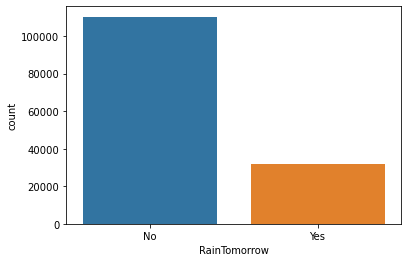

In [9]:
sns.countplot(data["RainTomorrow"])

In [10]:
categorical = [x for x in data.columns[15:-1]]

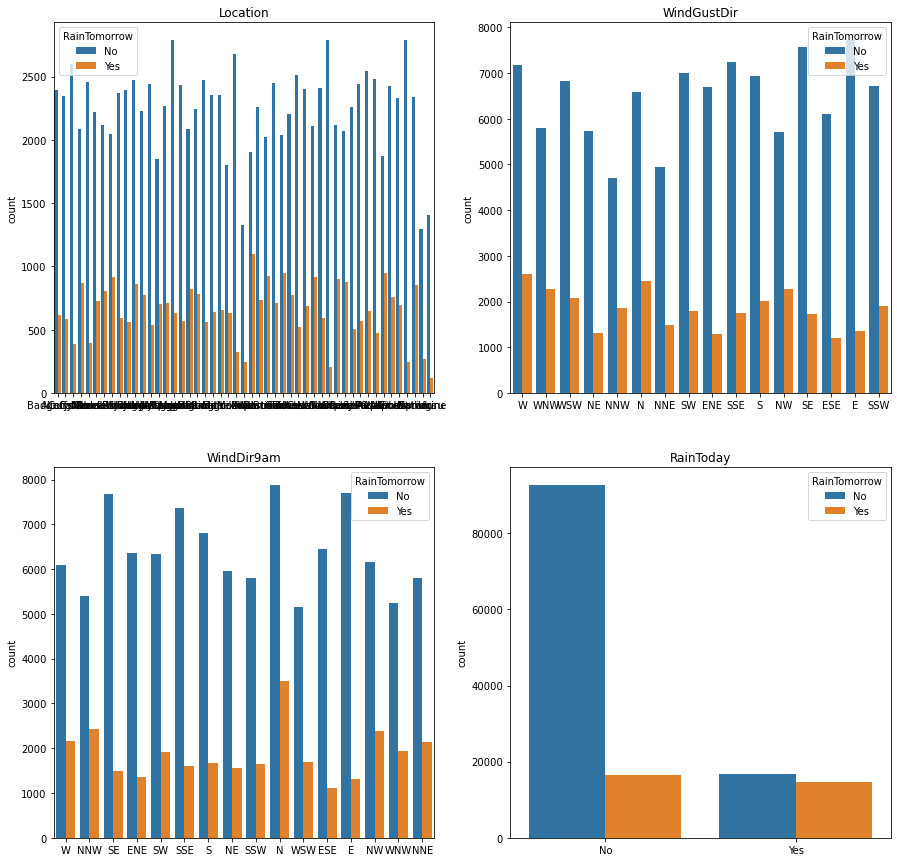

In [11]:
plt.figure(figsize = (15,15))
for i,c in enumerate(categorical):
    plt.subplot(2,2,i+1)
    sns.countplot(data[c], hue = data["RainTomorrow"])
    plt.title(c)
    plt.xlabel("")

     Grafiklerden görüleceği üzere veri setinde, ertesi gün yağmur yağmayacağına ait veri seti miktarı yağacağına ait veri seti miktarına baskındır.

### 3.2.2 Numerik Verilerin Görselleştirilmesi

In [12]:
numvalues = [clmn for clmn in data.columns[1:15]]

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>],
       [<AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>,
        <AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>],
       [<AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

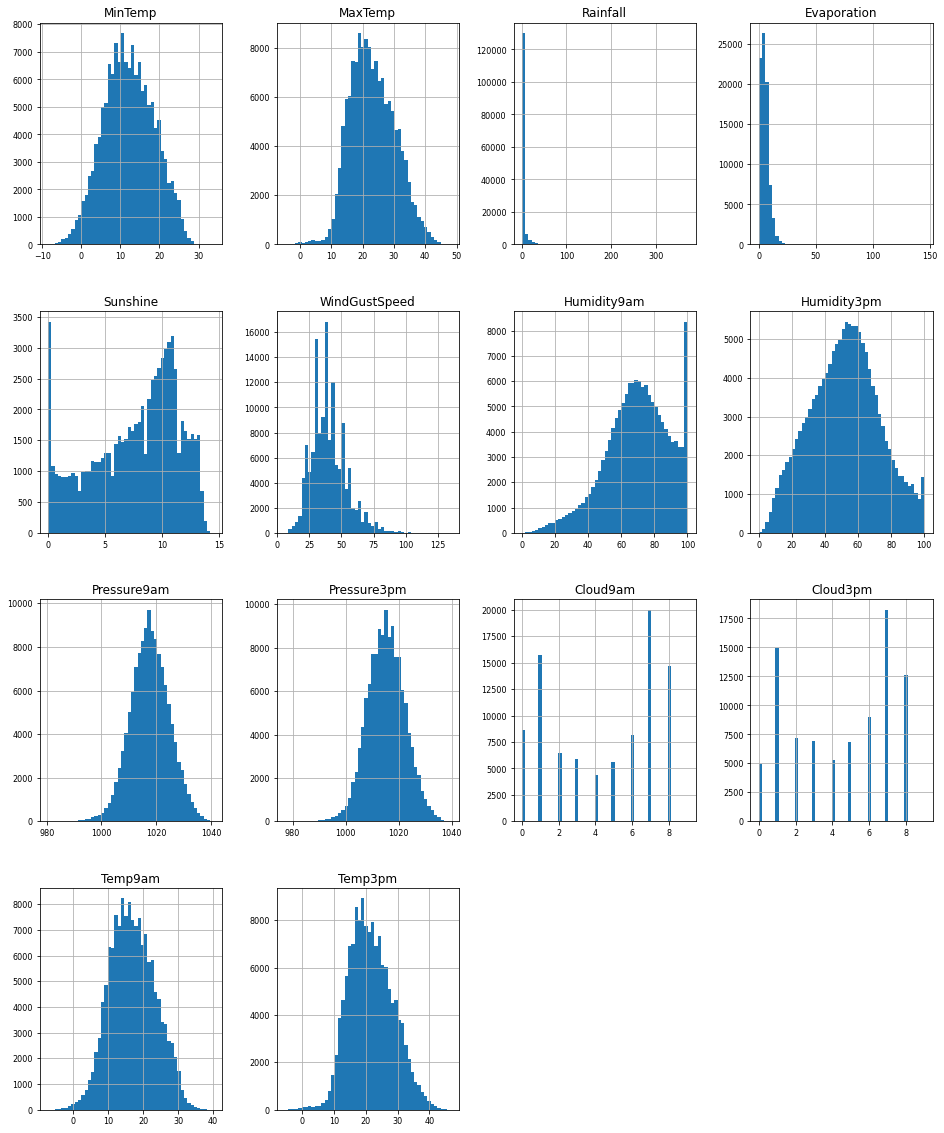

In [13]:
data[numvalues].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

 Numerik verilerin görselleştirilmesi sonrası özellikle RainFall ve Evaporation sınındaki sapma görülmektedir. Diğer özellikler normal dağılıma yakın seyretmektedir.

### 3.3. Aykırı Verilerin Analizi ve Düzenlenmesi

    Aykırı veriler bir çok makine öğrenmesi algoritması için sorun çıkarmaktadır. Aykırı verilerle iyi çalışmayan makina öğrenmesi tekniklerinden biri de lojistik regresyondur. Bu yüzden aykırı verilere ön işlem yapılması gerekmektedir. Bu çalışmada aykırı verilerdeki önemli bilgilerin kaybedilmemesi amacıyla aykırı veriler, üst ve alt çeyrekliğe eşitlenmiştir. 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   MinTemp        143975 non-null  float64       
 2   MaxTemp        144199 non-null  float64       
 3   Rainfall       142199 non-null  float64       
 4   Evaporation    82670 non-null   float64       
 5   Sunshine       75625 non-null   float64       
 6   WindGustSpeed  135197 non-null  float64       
 7   Humidity9am    142806 non-null  float64       
 8   Humidity3pm    140953 non-null  float64       
 9   Pressure9am    130395 non-null  float64       
 10  Pressure3pm    130432 non-null  float64       
 11  Cloud9am       89572 non-null   float64       
 12  Cloud3pm       86102 non-null   float64       
 13  Temp9am        143693 non-null  float64       
 14  Temp3pm        141851 non-null  float64       
 15  

<AxesSubplot:>

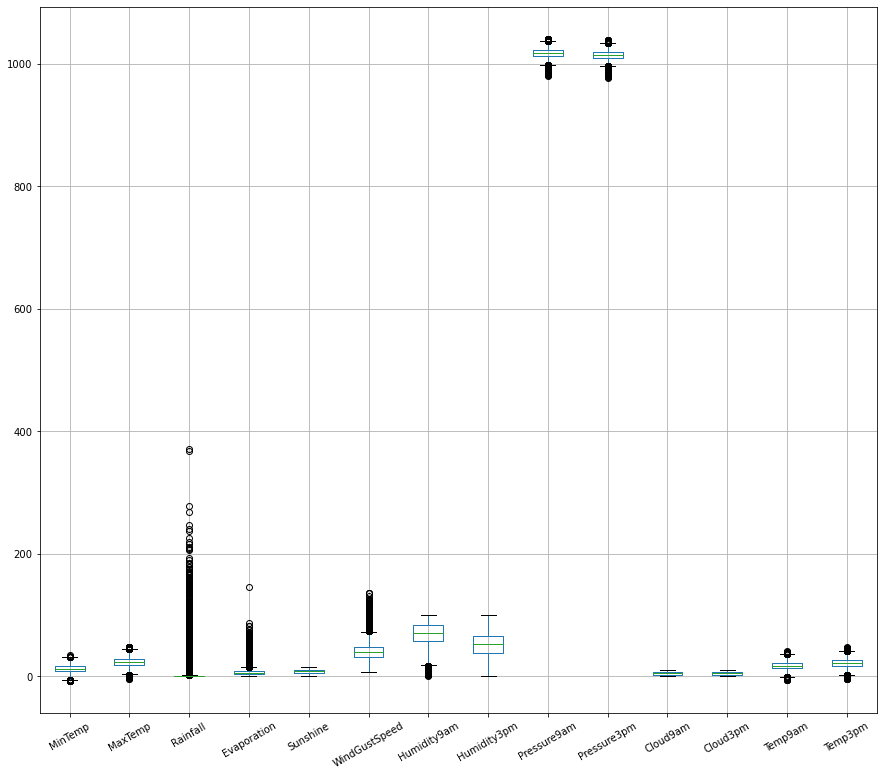

In [15]:
plt.figure(figsize=(15,13))
data.boxplot(numvalues, rot=30)

In [16]:
for feature in numvalues:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data.loc[data[feature]<lower_limit, feature] = lower_limit
    data.loc[data[feature]>upper_limit, feature] = upper_limit

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   MinTemp        143975 non-null  float64       
 2   MaxTemp        144199 non-null  float64       
 3   Rainfall       142199 non-null  float64       
 4   Evaporation    82670 non-null   float64       
 5   Sunshine       75625 non-null   float64       
 6   WindGustSpeed  135197 non-null  float64       
 7   Humidity9am    142806 non-null  float64       
 8   Humidity3pm    140953 non-null  float64       
 9   Pressure9am    130395 non-null  float64       
 10  Pressure3pm    130432 non-null  float64       
 11  Cloud9am       89572 non-null   float64       
 12  Cloud3pm       86102 non-null   float64       
 13  Temp9am        143693 non-null  float64       
 14  Temp3pm        141851 non-null  float64       
 15  

<AxesSubplot:>

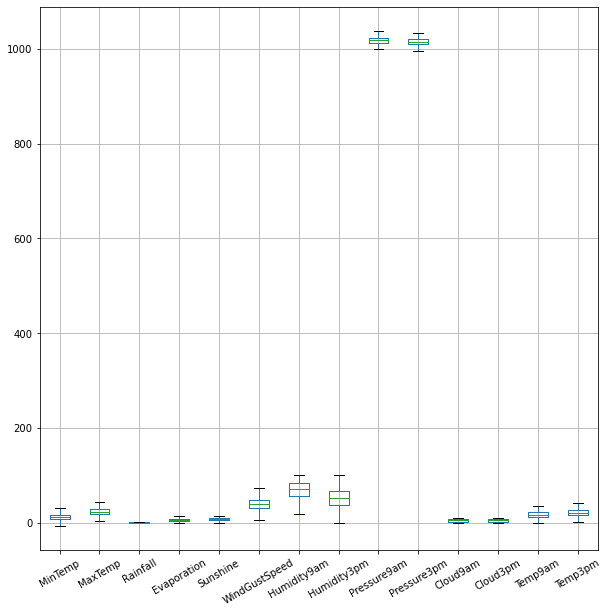

In [18]:
plt.figure(figsize=(10,10))
data.boxplot(numvalues, rot=30)

### 3.4. Kayıp Verilerin Analizi ve Düzenlenmesi

In [19]:
data.isnull().sum()

Date                 0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Location             0
WindGustDir      10326
WindDir9am       10566
RainToday         3261
RainTomorrow      3267
dtype: int64

In [20]:
data.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"], axis =1 ,inplace= True)

Evaporation, Sunshine, Cloud9am, Cloud3pm verilerinde eksik veri miktarının çok fazla olduğu göze çarpmaktadır. Bu eksik verilerle başa çıkmak için numerik veriler kutu grafiği kullanılarak görselleştirilmiştir.

1. Eksik Verilerin Veri Setinden Çıkarılması

    Eksik verilerin veriden çıkarılması bu veri setinde verilerin yarısından çoğunun elenmesi anlamına geliyor. Verilerin yarıdan çoğunun veri setinden çıkarılması çok önemli bilgi kayıplarına neden olabilceğinden bu veri setinde bu yaklaşım uygulanmamıştır.

2. Eksik Veri Bulunan Sütunların Veri Setinden Çıkarılması 

    Bu sütunlar veri setinden çıkarılırsa, 1. yaklaşımdan daha iyi sonuç elde edilebilir. Fakat çıkarılan sütuna ait verilerin, diğer sütunlarda olan kolerasyonu, analiz için önemli verileri içeriyor olabilir. Bu yüzden bu methot özellik sütunlarının %30 undan fazla olduğu sütunlarda tercih edilmiştir.
    
3. Eksik Verilerin Çeşitli Yöntemlerle Giderilmesi

    Bu yaklaşım bu veri seti için en olurlu yaklaşım olarak düşünülmüştür. 

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   MinTemp        143975 non-null  float64       
 2   MaxTemp        144199 non-null  float64       
 3   Rainfall       142199 non-null  float64       
 4   WindGustSpeed  135197 non-null  float64       
 5   Humidity9am    142806 non-null  float64       
 6   Humidity3pm    140953 non-null  float64       
 7   Pressure9am    130395 non-null  float64       
 8   Pressure3pm    130432 non-null  float64       
 9   Temp9am        143693 non-null  float64       
 10  Temp3pm        141851 non-null  float64       
 11  Location       145460 non-null  object        
 12  WindGustDir    135134 non-null  object        
 13  WindDir9am     134894 non-null  object        
 14  RainToday      142199 non-null  object        
 15  

Eksik verilerle başa çıkılırken numerik verilerin ortalama değer ile, kategorik verilerin ise mod yani en çok tekrar eden veri ile değiştirilmesi sağlanmıştır. Böylece fazla olan kayıp veri miktarının veri setinden çıkarılmaması sağlanmış önemli bilgi kaybına izin verilmemiştir.

In [22]:
for column in data.columns[1:10]:
    data[column] = data[column].fillna(data[column].mean())

In [23]:
for column in data.columns[10:]:
    data[column] = data[column].fillna(data[column].mode()[0])

In [24]:
data.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
Location         0
WindGustDir      0
WindDir9am       0
RainToday        0
RainTomorrow     0
dtype: int64

## 4. Verilerin Önişlenmesi

Verilerin önişlenme aşamasında kategorik verilerin, sayısal verilere dönüştürülmesi gerekmektedir. Çünkü bir çok makine öğrenmesi algoritması, öngörme işlemini yaparken kategorik verilerle çalışamamaktadır. Veri setinde bulunan kategorik verilerin her biri nominal verilerdir, veri seti ordinal veri içermemektedir.

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column in data.columns[11:]:
    data[column] = le.fit_transform(data[column])

In [26]:
data.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,44.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2,13,13,0,0
1,2008-12-02,7.4,25.1,0.0,44.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2,14,6,0,0
2,2008-12-03,12.9,25.7,0.0,46.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2,15,13,0,0
3,2008-12-04,9.2,28.0,0.0,24.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2,4,9,0,0
4,2008-12-05,17.5,32.3,1.0,41.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2,13,1,0,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   MinTemp        145460 non-null  float64       
 2   MaxTemp        145460 non-null  float64       
 3   Rainfall       145460 non-null  float64       
 4   WindGustSpeed  145460 non-null  float64       
 5   Humidity9am    145460 non-null  float64       
 6   Humidity3pm    145460 non-null  float64       
 7   Pressure9am    145460 non-null  float64       
 8   Pressure3pm    145460 non-null  float64       
 9   Temp9am        145460 non-null  float64       
 10  Temp3pm        145460 non-null  float64       
 11  Location       145460 non-null  int32         
 12  WindGustDir    145460 non-null  int32         
 13  WindDir9am     145460 non-null  int32         
 14  RainToday      145460 non-null  int32         
 15  

Yukarıdaki analizde veri setimizde obje tipi veri kalmadığı görülmektedir. Fakat veri seti hala uygun değildir. Çünkü 'Location' , 'WindGustDir' ve 'WindDir9am' verileri label encode yöntemi ile sayısal veriye dönüştürülmüştür. Fakat bu özellik seti nominal değerler içermektedir. Bu yüzden bu verileri vektör olarak önişlemek daha verimli olacaktır.

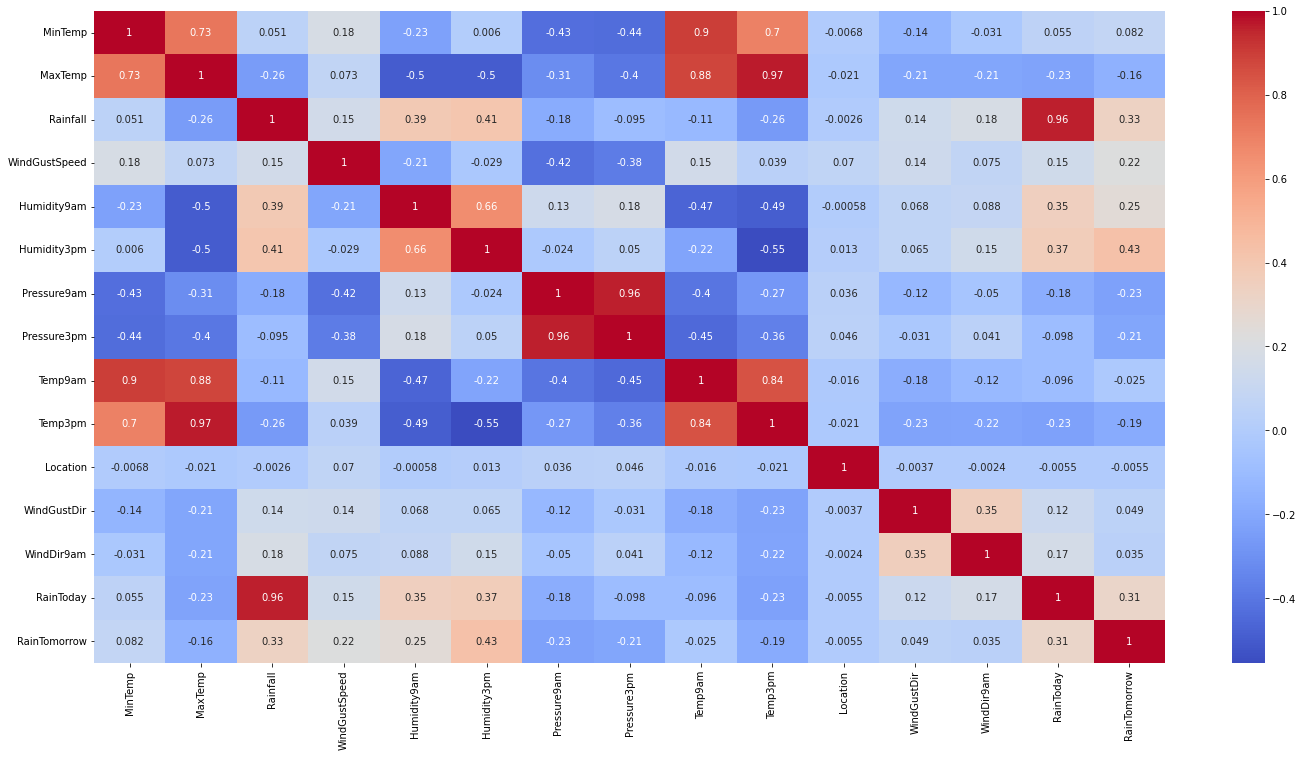

In [28]:
plt.figure(figsize =(24,12))
sns.heatmap(data.corr(), annot = True, cmap="coolwarm")
plt.show()

    Aşşağıdaki kodlarda nominal özellikler olan 'Location' , 'WindGustDir' ve 'WindDir9am' özellikleri vektör olarak önişlenmiştir. 

In [29]:
df_dummy = pd.get_dummies(data["WindGustDir"],prefix = "WindGustDir",drop_first = "True")                    

In [30]:
data.drop(labels = "WindGustDir", axis = 1, inplace = True)

In [31]:
data = pd.concat([data, df_dummy], axis=1)

In [32]:
df_dummy2 = pd.get_dummies(data["WindDir9am"],prefix = "WindDir9am", drop_first = "True")

In [33]:
data.drop(labels = "WindDir9am", axis=1, inplace = True)

In [34]:
data = pd.concat([data, df_dummy2], axis=1)

In [35]:
df_dummy3 = pd.get_dummies(data["Location"],prefix = "Location", drop_first = "True")

In [36]:
data = pd.concat([data, df_dummy3], axis=1)

In [37]:
data.drop(labels = "Location", axis = 1, inplace= True)

In [38]:
data_reminder = data[['RainToday', 'RainTomorrow']]
data_reminder

,RainToday,RainTomorrow
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


In [39]:
data.drop(["RainTomorrow", "RainToday"], axis = 1, inplace = True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 89 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            145460 non-null  datetime64[ns]
 1   MinTemp         145460 non-null  float64       
 2   MaxTemp         145460 non-null  float64       
 3   Rainfall        145460 non-null  float64       
 4   WindGustSpeed   145460 non-null  float64       
 5   Humidity9am     145460 non-null  float64       
 6   Humidity3pm     145460 non-null  float64       
 7   Pressure9am     145460 non-null  float64       
 8   Pressure3pm     145460 non-null  float64       
 9   Temp9am         145460 non-null  float64       
 10  Temp3pm         145460 non-null  float64       
 11  WindGustDir_1   145460 non-null  uint8         
 12  WindGustDir_2   145460 non-null  uint8         
 13  WindGustDir_3   145460 non-null  uint8         
 14  WindGustDir_4   145460 non-null  uin

In [41]:
data = pd.concat([data, data_reminder], axis=1)

In [42]:
data.head(5)

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,...,Location_41,Location_42,Location_43,Location_44,Location_45,Location_46,Location_47,Location_48,RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,44.0,71.0,22.0,1007.7,1007.1,16.9,...,0,0,0,0,0,0,0,0,0,0
1,2008-12-02,7.4,25.1,0.0,44.0,44.0,25.0,1010.6,1007.8,17.2,...,0,0,0,0,0,0,0,0,0,0
2,2008-12-03,12.9,25.7,0.0,46.0,38.0,30.0,1007.6,1008.7,21.0,...,0,0,0,0,0,0,0,0,0,0
3,2008-12-04,9.2,28.0,0.0,24.0,45.0,16.0,1017.6,1012.8,18.1,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,41.0,82.0,33.0,1010.8,1006.0,17.8,...,0,0,0,0,0,0,0,0,0,0


## 5. Modelin Hazırlanması, Kurulması ve Karşılaştırılması

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = data.drop(["RainTomorrow","Date"],axis = 1)
Y = data["RainTomorrow"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

Veri seti eğitim ve test setine ayrıldıktan sonra veri setinin dengeli olup olmadığına bakılması, tutarlı bir analiz için gerekliliktir. Grafiklerden görüldüğü üzere veri seti dengesizdir. Dengesizlikle başa çıkmak için başlıca 2 yöntem bulunmaktadır. Bunlar;

- Undersampling
- Oversampling

Bu veri setinde oversampling yöntemlerinden biri olan smote yöntemi kullanılmıştır. 

Smote Yöntemi Nedir ?

    Sentetik Azınlık Aşırı Örnekleme Yöntemi olarak Türkçeleştirilebilecek olan smote yöntemi, öklid mesafesi kullanarak uygulanan bir en yakın komşuluk algoritmasıdır. Azınlık sınıfı her bir azınlık sınıfı örnek alarak k-en yakın komşu algoritmasına göre birleştiren bir aşırı örnekleme metodudur. Gereken aşırı örnekleme miktarına bağlı olarak, en yakın yakın komşular rastgele olarak seçilir.
    

In [46]:
y_train.value_counts()

0    90914
1    25454
Name: RainTomorrow, dtype: int64

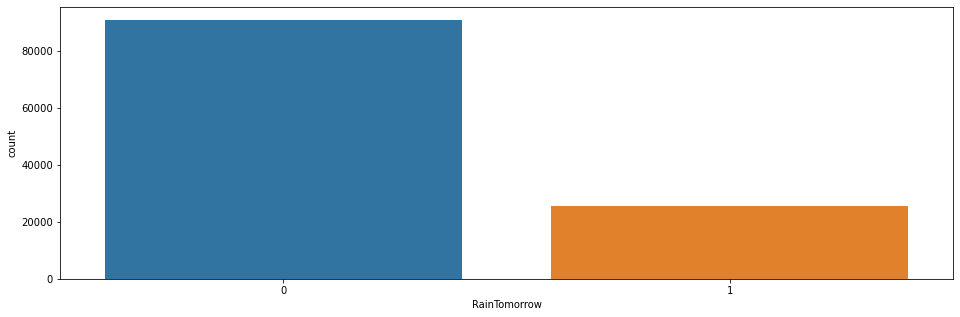

In [47]:
plt.figure(figsize =(16,5))
sns.countplot(y_train)
plt.show()

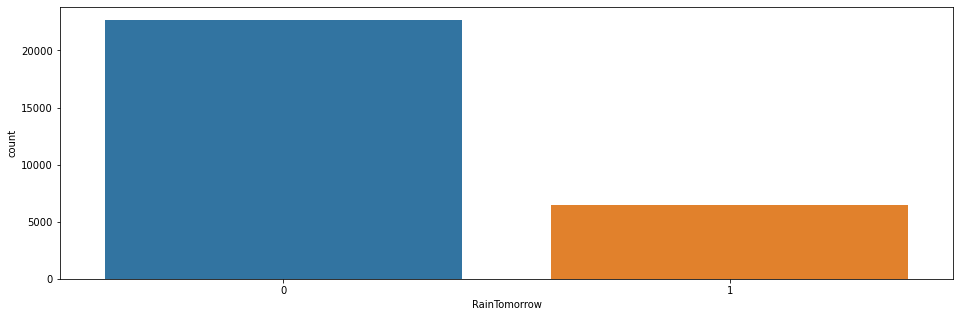

In [48]:
plt.figure(figsize =(16,5))
sns.countplot(y_test)
plt.show()

In [49]:
y_train.value_counts()

0    90914
1    25454
Name: RainTomorrow, dtype: int64

### 5.1 Veri Setinin Standardize Edilmesi ve Aşırı Örneklenmesi

In [50]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [51]:
smote_over_sampling = SMOTE(random_state=1 ,sampling_strategy="auto")

x_train_resampled, y_train_resampled = smote_over_sampling.fit_resample(X_train, y_train)

In [52]:
scaler = StandardScaler()

x_train_resampled = scaler.fit_transform(x_train_resampled)

X_test = scaler.transform(X_test)

### 5.2 Logistic Regression Yöntemi ile Model Oluşturulması

    Lojistik regresyon, bir sonucu belirleyen bir veya birden fazla bağımsız değişken bulunan veri setlerinde kullanılan istatistiksel bir yöntemdir.
    Lojistik regresyonda bağımlı değişken doğru(1) veya yanlış(0) değerini alan verileri içermektedir.
    
    Lojistik regresyonun amacı,  iki yönlü karakteristiği (bağımlı değişken = yanıt veya sonuç değişkeni) ile ilgili bir dizi bağımsız (öngörücü veya açıklayıcı) değişken arasındaki ilişkiyi tanımlamak için en uygun modeli bulmaktır. Lojistik regresyon, ilgi karakteristiklerinin varlığının olasılığını logit dönüşümünü tahmin etmek için bir formülün katsayılarını üretir:
    
    

    Burada p, karakteristik özelliğinin var olma olasılığıdır.

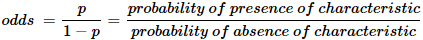

    ve

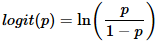

    Karekök hataların toplamını en aza indirgeyen parametreleri seçmek yerine (sıradan regresyon gibi), lojistik regresyonda tahmin, örnek değerlerin gözlem olasılığını en yükseğe çıkaran parametreleri seçer.

    Lojistik regresyon, bağımlı değişkenin stokastik bir olay olduğunu varsayar. Örneğin, kalp hastasının ölme oranını analiz edersek, sonuç ölür veya ölmez olur. En dirençli hatalardan biri bile ancak bu iki durumdan biri olabilir; lojistik regresyon hastanın ölme ihtimalini düşünür. Eğer hastanın ölme ihtimali> 0.5 ise ölü kabul edilir, eğer <0.5 ise canlı olarak kabul edilir.
    
    
    
    
    

In [53]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(x_train_resampled, y_train_resampled)

LogisticRegression(random_state=0, solver='liblinear')

### 5.3. Lojistik Regresyon Veri Setine Nasıl Uygulandı?

Veri setine lojistik regresyon liblinear yöntemi ile uygunlanmıştır. Çünkü orta ve küçük çaplı veri setlerinde liblinear yöntemi daha hızlı ve kararlı sonuçlar vermektedir.

In [54]:
preds = logreg.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
accuracy_score(y_test, preds)

0.8278220816719373

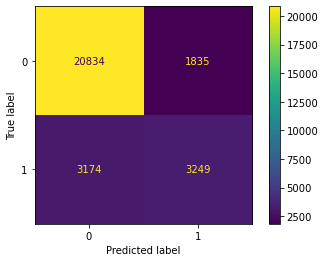

In [57]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test,y_test)

In [58]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7813
Test set score: 0.8278


In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test , preds))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     22669
           1       0.64      0.51      0.56      6423

    accuracy                           0.83     29092
   macro avg       0.75      0.71      0.73     29092
weighted avg       0.82      0.83      0.82     29092



## 5.4. Lojistik Regresyon Modelini Optimize Etmek

Logistic Regresyonnun varsayımlarından birisi veriler arasında(karar verici hariç) %95 kolerasyondan fazlası bulunmamasıdır. Bu yüzden kolerasyon oranlarına bakıp yüksek kolerasyon içeren veri setlerinden birini elenmelidir. Böylece özellik setleri arasındaki kolerasyonu azaltabilir. Modelin daha stabil çalışması sağlanabilir.

In [61]:
dataifcorr = data.iloc[:,1:11]

In [62]:
dataifcorr = pd.concat([dataifcorr, data["RainToday"]], axis=1)

MaxTemp ile Temp3pm arasında %97

Pressure9am ile Pressure3pm arasında %96

Kolerasyon bulunmaktadır. Bu yüzden bu çiftlerden sadece birini alıp model optimize edilmeye çalışıldı.

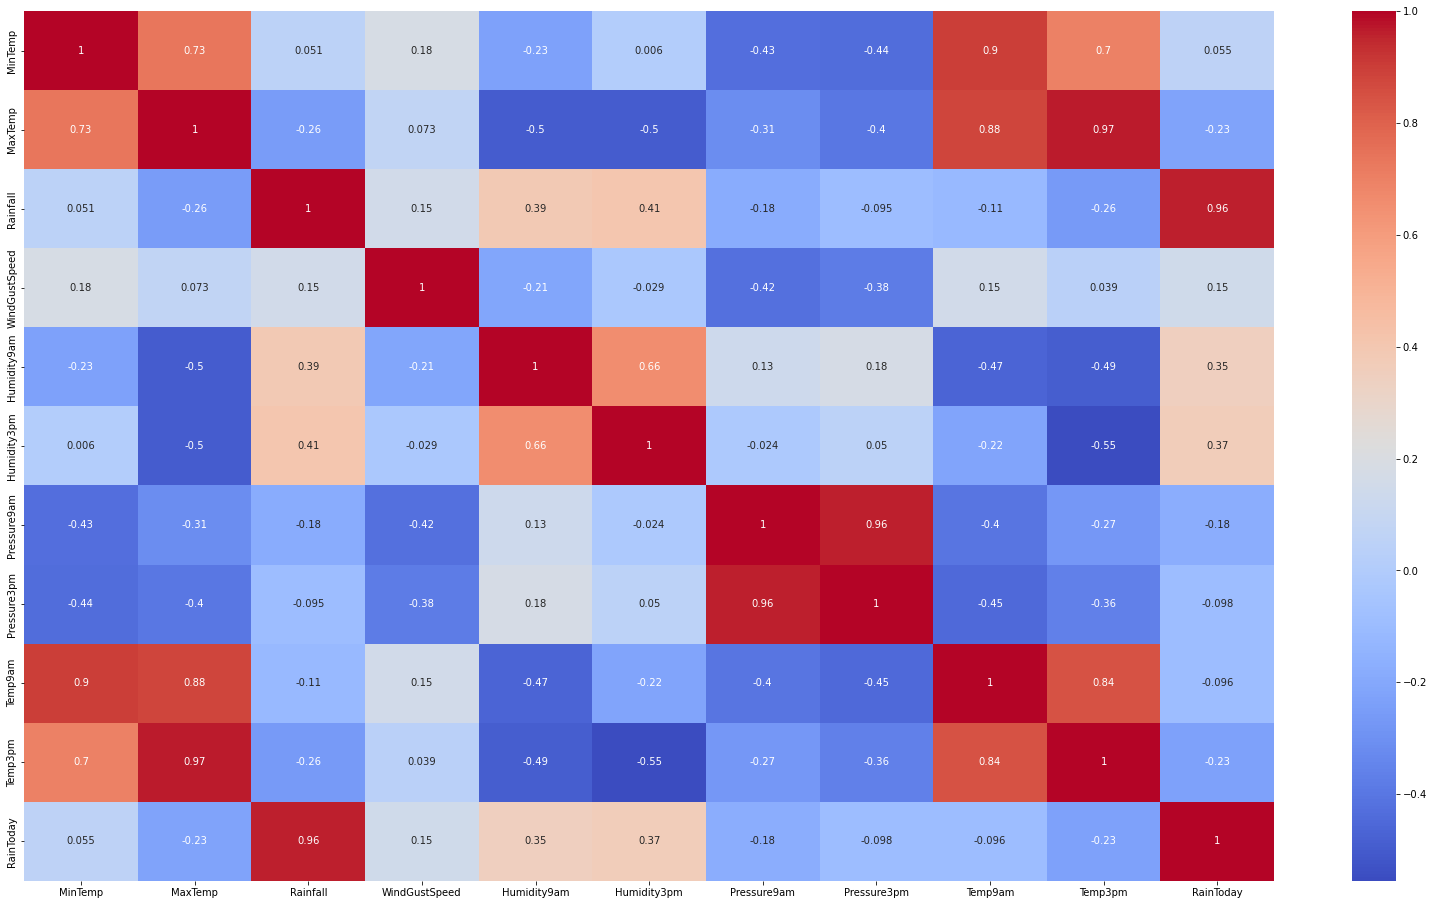

In [63]:
plt.figure(figsize =(28,16))
sns.heatmap(dataifcorr.corr(), annot = True, cmap="coolwarm")
plt.show()

In [64]:
X2 = data.drop(["RainTomorrow","Date","Temp3pm","Pressure3pm","MinTemp","Rainfall"],axis = 1)
Y2 = data["RainTomorrow"]

In [65]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.2)

In [66]:
smote_over_sampling = SMOTE(random_state=1 ,sampling_strategy="auto")

x_train_resampled2, y_train_resampled2 = smote_over_sampling.fit_resample(X_train2, y_train2)

In [67]:
scaler2 = StandardScaler()

x_train_resampled2 = scaler2.fit_transform(x_train_resampled2)

X_test2 = scaler2.transform(X_test2)

In [68]:
logreg2 = LogisticRegression(solver='liblinear', random_state=0)
logreg2.fit(x_train_resampled2, y_train_resampled2)

LogisticRegression(random_state=0, solver='liblinear')

In [69]:
preds2 = logreg2.predict(X_test2)

Özellik indirgeme sonrası doğruluk değerleri ile başta yapılan modelin doğruluk değerleri benzer çıksa da ilk doğruluk değeri daha yüksek seyretmiştir.

In [70]:
accuracy_score(y_test2, preds2)

0.8251065585040561

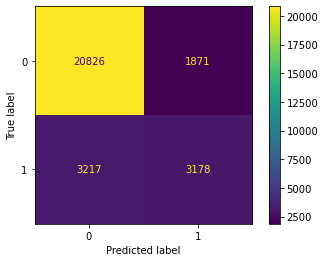

In [71]:
plot_confusion_matrix(logreg2, X_test2,y_test2)

In [72]:
print(classification_report(y_test2 , preds2))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     22697
           1       0.63      0.50      0.56      6395

    accuracy                           0.83     29092
   macro avg       0.75      0.71      0.72     29092
weighted avg       0.81      0.83      0.82     29092



In [73]:
X3 = data.drop(["RainTomorrow","Date"],axis = 1)
Y3 = data["RainTomorrow"]

In [74]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size = 0.2)

In [75]:
smote_over_sampling = SMOTE(random_state=1 ,sampling_strategy="auto")

x_train_resampled3, y_train_resampled3 = smote_over_sampling.fit_resample(X_train3, y_train3)

In [76]:
scaler3 = StandardScaler()

x_train_resampled3 = scaler3.fit_transform(x_train_resampled3)

X_test3 = scaler3.transform(X_test3)

## 5.5. XGBoost Nedir ?

    Xgboost(Extreme Gradiant Boosting), gradient boosting algoritmasının modifiye edilmiş ve daha yüksek performanslı halidir. İlk olarak Tianqi Chen ve Carlos Guestrin tarafından 2016 yılında “XGBoost: A Scalable Tree Boosting System” adlı makalede önerilmiştir. Xgboost algıritması kayıp ve aykırı verilerle uyumlu çalışması yönünden avantajlıdır. 
    
### 5.5.1 Xgboost Algoritmasının Çalışma Mantığı
    
    Xgboost algoritmasının çalışma presinbini gradient boosting algoritmasının çalışma prensibine bir hayli benzerdir. Bu yüzden ilk başta gradient boosting algoritmasının çalışma prensibine bakılmalıdır.

####  5.5.1.1 Gradient Boosting
        
        Gradyan artırma, regresyon ve sınıflandırma problemleri için bir makine öğrenmesi tekniğidir. Bu, zayıf tahmin modellerinin bir araya gelmesiyle tipik olarak karar ağaçlarının oluşturduğu bir model oluşturur.
    Denetlenen herhangi bir öğrenme algoritmasının amacı, bir kayıp fonksiyonu tanımlamak ve en aza indirmektir.
        
        
    Gradient Boosted Regresyon Ağaçları 4 adımda hesaplanmaktadır.
    
##### 1. Adım
    
    Kayıp fonksiyonu(loss function) tanımlanır. Kayıp fonksiyonu, modelin katsayılarının temel alınan veriye uymada ne kadar iyi olduğunu gösteren bir ölçüdür.

    Aşağıdaki formül ile gösterilir.

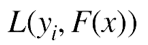

##### 2. Adım

    Sabit değişken belirlenir.

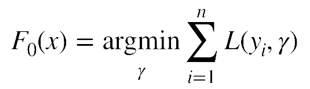

Formülde sigma’nın içindeki değer kayıp fonksyonudur. yi gözlemlenen değer, Y(gamma) tahminlenen değeridir.

Tüm gözlemler için kayıp fonksiyonu toplanacak ve değerinin minimum hali bulunacaktır. Bunun için kayıp fonksiyonunun türevi alınır, değerler toplanır ve sıfıra eşitlenir. Sonuç olarak initial leaf bulunur. Bu değer hedef değişkendeki tüm değerlerin ortalamasına eşittir.

##### 3. Adım
3 . adım 4 aşamada gerçekleşmektedir ve tüm ağaçlarda uygulanacak bir döngüdür.

Önceki tahmine göre hatalar hesaplanır.

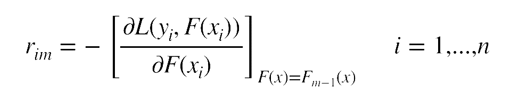

Formülde r, residual anlamına gelmektedir. i gözlem numarası, m kurulan ağacın numarasını ifade eder.

Parantez içi türevi alınmış kayıp fonksiyonudur. Parantez dışında bakıldığında F(x) değerinin bir önceki ağacın çıktısını ifade ettiği görülmektedir.

Bu formül ile tüm gözlemler için kalıntılar hesaplanır.

Sonrasında residual’lar için karar ağacı oluşturulur ve her yaprağın değeri bulunur.

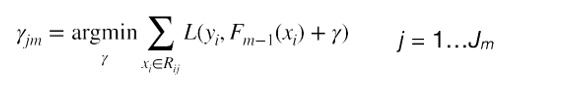

Formül her yaprak için hatayı minimize eder. (2. Adımda olduğu gibi, ancak burada formül Fm-1’i yani bir önceki tahmin değerini kullanır.)

Yine aynı şekilde kayıp fonksiyonunun türevi alınır ve değerler toplanıp sınıfa eşitlenir. Çıkan sayı yaprağın değeridir.

Her gözlem için tahmin oluşturulur.

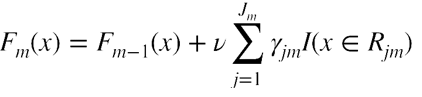

Formül incelendiğinde F(x)=önceki ağacın sonuçları + learning rate*yeni ağaç olduğu görülmektedir.

Döngü bu şekilde devam edecektir.

### 5.5.2. Xgboost Algoritmasının un Gradiant Boost Algoritmasından Farkı Nedir?

Gradient Boosting’den ayrıştığı başlıca konular aşağıdadır.

- Regülarizasyon
- Budama
- Boş Değerler ile Çalışılabilesi
- Sistem Optimizasyonu

#### Budama

 XGBoost, bunun aksine en basindan max_depth parametresi ile agacin derinligini belirleyerek, eger agac asagi yonde fazla ilerledi ise geriye dogru budama yapar. XGBoost derinlige oncelik verdigi icin karmasikligi, dolayisiyla hesaplama performansini önemli ölçüde artirir.
 

In [77]:
import xgboost as xgb

In [78]:
xgbcls = xgb.XGBClassifier(n_estimators = 500, max_depth = 16)

### 5.5.3 Xgboost Algoritması Veri Setine Nasıl Uygulandı?

#### 5.5.3.1 Parametreler

n_estimators = 500, modelde kaç tane karar ağacı bulundurulacağı girdisini alır, ne kadar çok değer girilirse tahminin kesinliği okadar yüksek olacaktır. Fakat algoritmanın çalışma süresinde artış da karar ağacı sayısıyla doğru orantılır. Kullanılan modelde 500 değeri deneme yanılma yolula elde edilmiştir.

max_depth = 16, ağaçların derinliğini ifade eder, bu değer 3'den başlatılmış ve arttırılarak devam edilmiştir.

In [79]:
xgbcls.fit(x_train_resampled3, y_train_resampled3)

[01:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=16, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
preds3 = xgbcls.predict(X_test3)

In [81]:
accuracy_score(y_test3, preds3)

0.8511962051423072

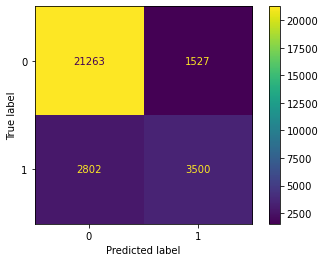

In [82]:
plot_confusion_matrix(xgbcls, X_test3,y_test3)

## 6. Performans Metrikleri ve Ölçümler

#### 6.1. Doğruluk(Accuracy)

    Doğru olarak sınıflandırılan örneklerin yüzdesidir.
    
    

#### 6.2. Duyarlılık(Recall)
    Pozitif olarak tahmin etmemiz gereken işlemlerin ne kadarını pozitif olarak tahmin ettiğimizi gösteren bir metriktir. 
    

#### 6.3. Kesinlik(Precision)

    Pozitif olarak tahminlediğimiz değerlerin gerçekten kaç adedinin pozitif olduğunu göstermektedir.

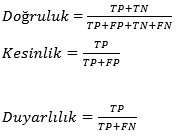

#### 6.4. F1 Skor(F1 Score)

       F1 skoru, bir testin doğruluğunun bir ölçüsüdür —kesinlik ve duyarlılığın harmonik ortalamasıdır. Maksimum 1 (mükemmel kesinlik ve duyarlılık) ve minimum 0'a sahip olabilir. 

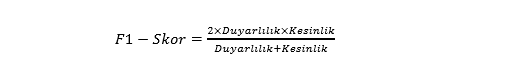

In [83]:
print(classification_report(y_test3 , preds3))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     22790
           1       0.70      0.56      0.62      6302

    accuracy                           0.85     29092
   macro avg       0.79      0.74      0.76     29092
weighted avg       0.84      0.85      0.84     29092



#### 6.5. AUC-ROC Eğrisi (AUC-ROC CURVE)

    ROC bir olasılık eğrisidir. AUC, ROC eğrisinin altında kalan alandır. Modelleri sınıflar arasında ne kadar ayırt edebildiğini anlatır. AUC yükseldikce, model tahmin etmede daha iyi demektir. Yani eğrinin altında kalan alan ne kadar yüksekse tahmin okadar iyidir.

In [84]:
from sklearn.metrics import plot_roc_curve

En yüksek AUC değerini de xgboost algoritması almıştır. Sonuç olarak en iyi performansı veren model xgboost modeli olmuştur. Avusturya'da yağmur yağıp yağmayacağı %85 ihtimalle tahmin edilebilirdir.

<Figure size 936x792 with 0 Axes>

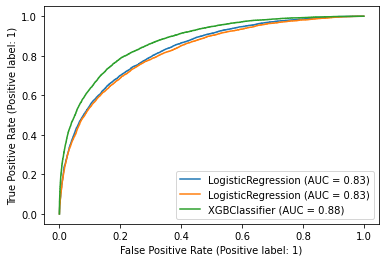

In [85]:
plt.figure(figsize=(13,11))
disp = plot_roc_curve(logreg
                      , X_test, y_test)
plot_roc_curve(logreg2, X_test2, y_test2
               , ax = disp.ax_)
plot_roc_curve(xgbcls, X_test3, y_test3
               , ax = disp.ax_)

## 7. Sonuç

    Sonuç olarak, Avusturya'nın belirli şehirlerinde yapılan ölçümlerden, yağmur yağıp yağmayacağının tahmini denetimli öğrenme algoritmalarından lojistik regresyon ve xgboost kullanılarak yapılmıştır. Farklı tahminleme algoritmaları karşılaştırılıp optimize edilmeye çalışılmıştır. Veri setinde bulunan dengesizlik neticesiyle aşırı örnekleme algoritmalarından   smote algoritması kullanılmış fakat yağmur yağdığı durumlarda bütün modeller yetersiz kalmıştır. Bunun sonucunda en iyi sonucu veren algoritmanın 0.85 oran ile xgboost olduğu görülmüştür. Ayrıca rog eğrisi metriği de hesaplanmış en iyi sonucu veren model tekrar xgboost olarak belirlenmiştir. Avusturya'da yağmur yağıp yağmayacağı eldeki veriler ışığında %85 ihtimalle doğru öngürülebilir.

### Kaynaklar

https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5

https://yigitsener.medium.com/veri-biliminde-kategorik-de%C4%9Fi%C5%9Fkenler-dummy-kukla-variable-ve-python-uygulamas%C4%B1-e086cb9a4f71

https://stackoverflow.com/questions/36107820/how-to-tune-parameters-in-random-forest-using-scikit-learn

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

## Hazırlayan

    Yağız Can Delibaş                   1906103503
    İzmir Demokrasi Üniversitesi Veri Madenciliği Dersi Dönem Projesi